Resultado do Teste	Faixa			Quantidade	Percentual (%)
Acima da Média		> Média (15232.00)		29		52.73
Na Média		= Média (15232.00)		0		0.00
Abaixo da Média		< Média (15232.00)		26		47.27

Arquivo 'resultado_teste_soma_colocacoes.csv' salvo com sucesso.



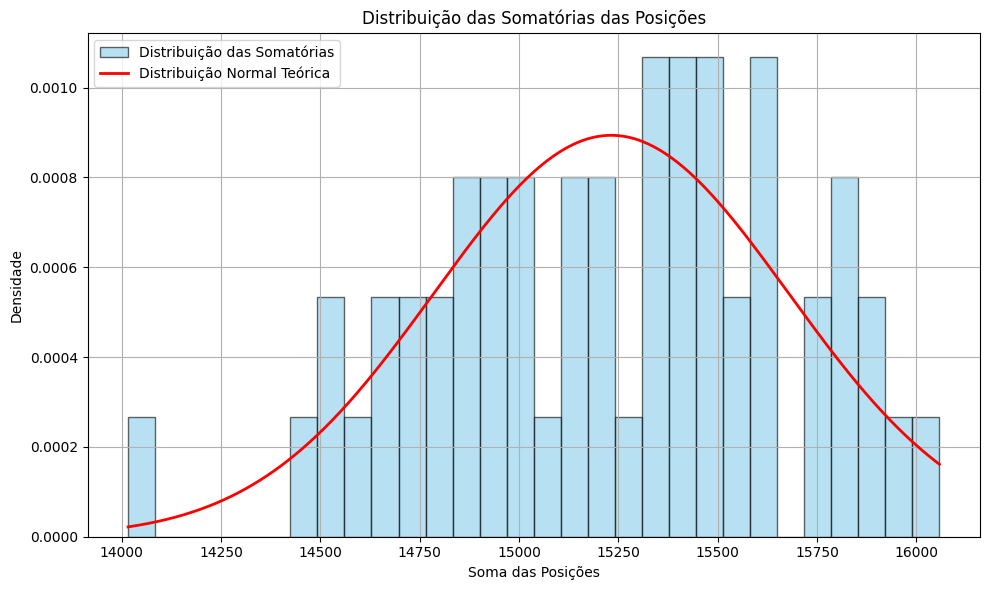

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings

# Configuração
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings("ignore")

# Caminhos dos arquivos
file_path = "2-resultados_sorteios.csv"
output_path = "resultado_teste_soma_colocacoes.csv"

try:
    # Leitura do CSV
    df = pd.read_csv(file_path, sep="\t", engine="python")
    df.columns = [f"col_{i}" for i in range(1, df.shape[1] + 1)]
    df_numeric = df.apply(pd.to_numeric, errors='coerce')

    # Seleção das colunas dos sorteios (ignorando as duas primeiras)
    sorteio_data = df_numeric.iloc[:, 2:]
    somas = sorteio_data.sum(axis=1, skipna=True)

    # Estatísticas globais
    media = np.mean(somas)
    desvio = np.std(somas, ddof=1)

    # Classificação
    acima = (somas > media).sum()
    igual = (somas == media).sum()
    abaixo = (somas < media).sum()
    total = len(somas)

    # Exibição do resumo
    print("Resultado do Teste\tFaixa\t\t\tQuantidade\tPercentual (%)")
    print(f"Acima da Média\t\t> Média ({media:.2f})\t\t{acima}\t\t{(acima / total) * 100:.2f}")
    print(f"Na Média\t\t= Média ({media:.2f})\t\t{igual}\t\t{(igual / total) * 100:.2f}")
    print(f"Abaixo da Média\t\t< Média ({media:.2f})\t\t{abaixo}\t\t{(abaixo / total) * 100:.2f}")
    print()

    # Monta DataFrame de saída
    resultado_df = pd.DataFrame({
        'candidato': [f"candidato {i+1}" for i in range(total)],
        'media': [media] * total,
        'desvio_padrao': [desvio] * total,
        'soma_posicoes': somas
    })

    # Salva o CSV
    resultado_df.to_csv(output_path, index=False)
    print(f"Arquivo '{output_path}' salvo com sucesso.")
    print()
    print()

    # Gráfico
    plt.figure(figsize=(10, 6))
    count, bins, ignored = plt.hist(somas, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Distribuição das Somatórias')

    x = np.linspace(min(bins), max(bins), 1000)
    plt.plot(x, norm.pdf(x, media, desvio), 'r-', lw=2, label='Distribuição Normal Teórica')

    plt.xlabel("Soma das Posições")
    plt.ylabel("Densidade")
    plt.title("Distribuição das Somatórias das Posições")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print(f"Erro: o arquivo '{file_path}' não foi encontrado.")

except pd.errors.EmptyDataError:
    print(f"Erro: o arquivo '{file_path}' está vazio ou mal formatado.")

except Exception as e:
    print(f"Ocorreu um erro ao processar os dados: {e}")
